In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wfdb
import gudhi

import gudhi.representations.vector_methods as grvm

In [2]:
record = wfdb.rdrecord(record_name='data_original/mitdb/111', sampfrom=2000 ,sampto=3000)

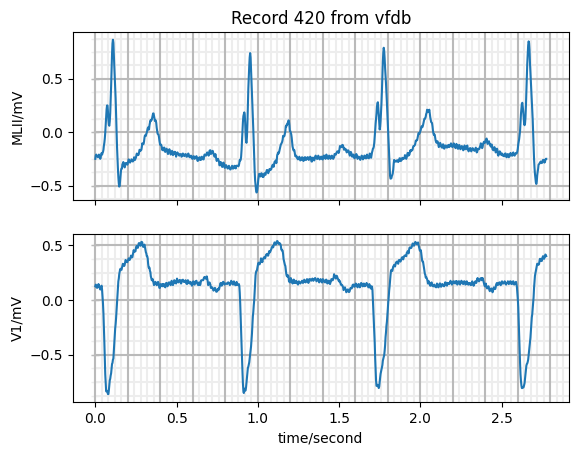

In [3]:
wfdb.plot_wfdb(record=record, title='Record 420 from vfdb', ecg_grids='all')

In [4]:
ecg_data = record.p_signal

In [5]:
print(ecg_data)

[[-0.25   0.125]
 [-0.22   0.14 ]
 [-0.21   0.13 ]
 ...
 [-0.265  0.415]
 [-0.25   0.41 ]
 [-0.25   0.4  ]]


In [ ]:
# rips_complex = gudhi.RipsComplex(points=ecg_data)
# simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

rips_complex = gudhi.RipsComplex(points=ecg_data)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

In [ ]:
persistence = simplex_tree.persistence()

In [8]:
print(persistence)

[(1, (0.11704699910719625, 0.39528470752104744)), (1, (0.06946221994724902, 0.19313207915827965)), (1, (0.039051248379533304, 0.07762087348130006)), (1, (0.0901387818865998, 0.1285496013218244)), (1, (0.09000000000000001, 0.12509996003196805)), (1, (0.08062257748298553, 0.11236102527122122)), (1, (0.04609772228646442, 0.07433034373659254)), (1, (0.03201562118716427, 0.05700877125495695)), (1, (0.03535533905932738, 0.058523499553598125)), (1, (0.026925824035672508, 0.04716990566028299)), (1, (0.04609772228646445, 0.06519202405202652)), (1, (0.036400549446402565, 0.05024937810560444)), (1, (0.07382411530116696, 0.08746427842267947)), (1, (0.054083269131959835, 0.065)), (1, (0.03640054944640259, 0.04716990566028302)), (1, (0.04527692569068709, 0.05590169943749477)), (1, (0.08485281374238571, 0.09513148795220225)), (1, (0.03905124837953329, 0.049244289008980514)), (1, (0.050000000000000024, 0.06)), (1, (0.04301162633521316, 0.052201532544552794)), (1, (0.011180339887498935, 0.0199999999999

In [28]:
simplex_tree.persistence_intervals_in_dimension(1)

array([[0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.005     , 0.00707107],
       [0.

usetex mode requires TeX.


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

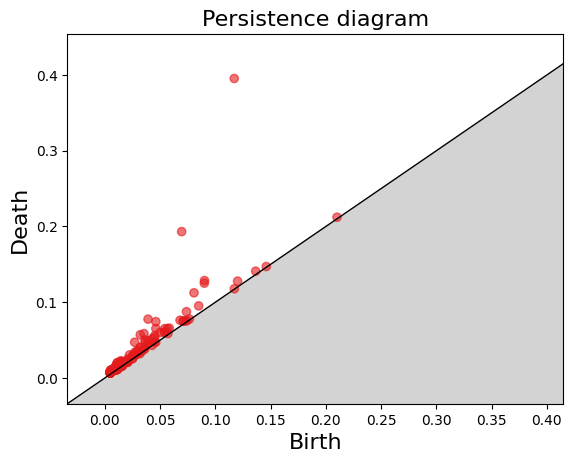

In [10]:
gudhi.plot_persistence_diagram(simplex_tree.persistence_intervals_in_dimension(1))

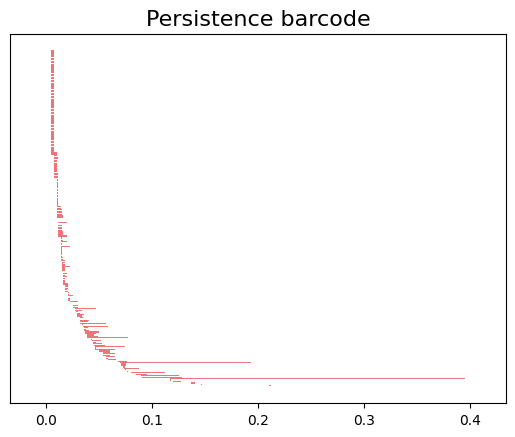

In [11]:
barcode = gudhi.plot_persistence_barcode(simplex_tree.persistence_intervals_in_dimension(1))

In [12]:
lives = [p[1] for p in persistence]
births = [b for (b, d) in lives]
deaths = [d for (b, d) in lives]
lives = np.column_stack((births, deaths))

In [13]:
betti_curve_maker = grvm.BettiCurve(sample_range=[0.0, 1.0], resolution=100)

In [1]:
betti_curve = betti_curve_maker(simplex_tree.persistence_intervals_in_dimension(1))

NameError: name 'betti_curve_maker' is not defined

In [15]:
betti_curve

array([ 0, 33,  7,  7,  8,  9,  6,  4,  3,  5,  4,  4,  5,  2,  2,  2,  2,
        2,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

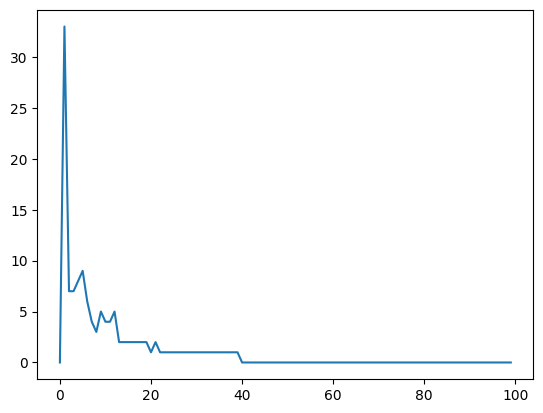

In [16]:
from matplotlib import pyplot as plt
plt.plot(betti_curve)

In [39]:
LS = gudhi.representations.Landscape(resolution=100)

In [40]:
L = LS.fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])

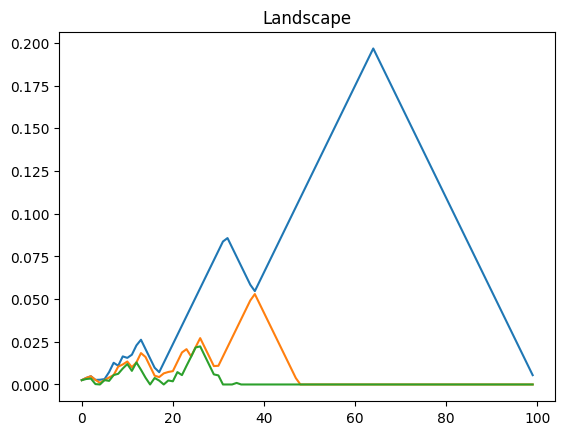

In [50]:
plt.plot(L[0][:100])
plt.plot(L[0][100:200])
plt.plot(L[0][200:300])
plt.title("Landscape")
plt.show()